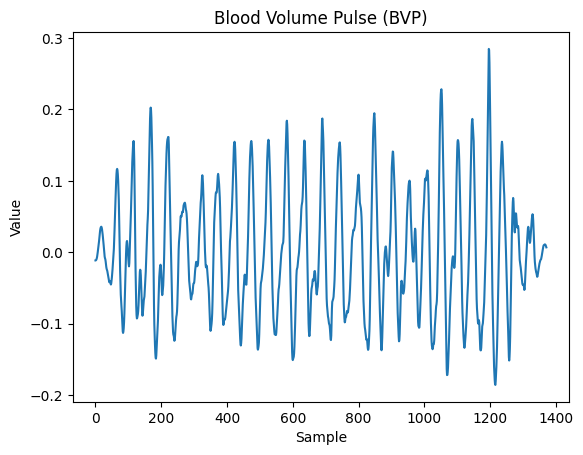

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, czt

# Load file
data = np.load("pos_output.npy")

# Plot
plt.plot(data)
plt.title("Blood Volume Pulse (BVP)")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.show()

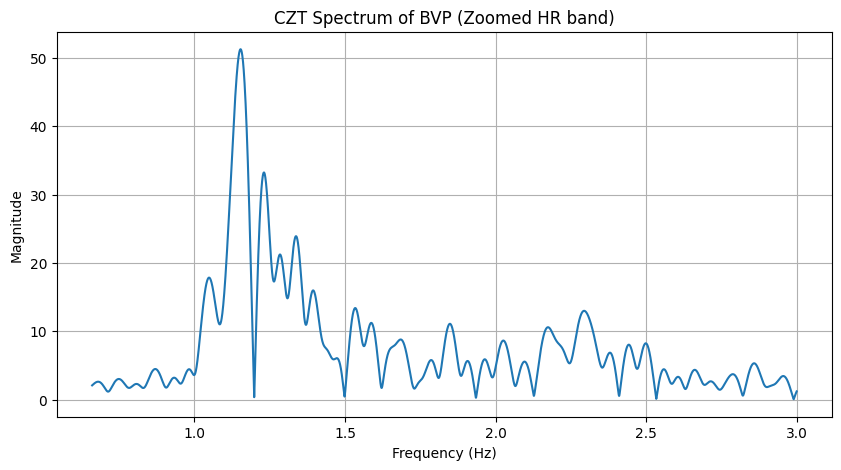

HR estimated by CZT: 69.18857142857142 bpm


In [5]:
fs = 60
cutoff = 4

bvp = data  # your BVP signal here

def lowpass(signal, fs, cutoff):
    b, a = butter(
        N=4,
        Wn=cutoff / (fs / 2),
        btype='low'
    )
    return filtfilt(b, a, signal)

# 1 — Low-pass filter
bvp_lpf = lowpass(bvp, fs, cutoff)

# 2 — Define the CZT frequency range you want to zoom into
f_min = 0.66   # 40 bpm
f_max = 3.0   # 180 bpm

# Number of CZT frequency bins (resolution)
M = 4096  # high spectral resolution

# 3 — Convert to angular frequencies for CZT
w = np.exp(-1j * 2 * np.pi * (f_max - f_min) / (M * fs))
a = np.exp(1j * 2 * np.pi * f_min / fs)

# 4 — Apply CZT
czt_vals = czt(bvp_lpf, m=M, w=w, a=a)

# 5 — Create the frequency axis
czt_freqs = np.linspace(f_min, f_max, M)

# 6 — Power spectrum
czt_power = np.abs(czt_vals)

# ----- Plot -----
plt.figure(figsize=(10,5))
plt.plot(czt_freqs, czt_power)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("CZT Spectrum of BVP (Zoomed HR band)")
plt.grid(True)
plt.show()

# 7 — Extract HR
peak_freq = czt_freqs[np.argmax(czt_power)]
hr_czt = peak_freq * 60
print("HR estimated by CZT:", hr_czt, "bpm")
